In [1]:
from typing import Callable, Tuple

import numpy as np
import pandas as pd
import torch.nn

device = torch.device('cpu')
dtype = torch.double
torch.set_default_dtype(dtype)


# todo ugly - to refactor

def load_train_testXY(path: str, test_size: float) -> Tuple[
    torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    dataX = pd.read_csv(path)['x'].values
    dataY = pd.read_csv(path)['y'].values
    dataX = np.array(dataX, dtype=np.float64)
    dataY = np.array(dataY, dtype=np.float64)

    X = dataX.reshape((-1, 1, 1))
    X = torch.from_numpy(X).to(device)
    y = dataY.reshape((-1, 1, 1))
    y = torch.from_numpy(y).to(device)

    return X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]


def load_train_test(path: str, division: float, max_samples: int = -1) -> Tuple[
    torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    data = pd.read_csv(path)['y'].values
    data = np.array(data, dtype=np.float64)
    X = data[:-1].reshape((-1, 1, 1))[:max_samples]
    X = torch.from_numpy(X).to(device)
    y = data[1:].reshape((-1, 1, 1))[:max_samples]
    y = torch.from_numpy(y).to(device)
    size = X.shape[0]
    p = int(size * division)
    return X[:p], X[p:], y[:p], y[p:]


def load_train_test2(path: str, p: float, max_samples: int = -1) -> Tuple[
    torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    data = pd.read_csv(path)['y'].values
    print(data.dtype)
    data = np.array(data, dtype=np.float64)
    print(data.dtype)

    X = data[:-1].reshape((-1, 1, 1))[:max_samples]
    print(X.dtype)
    X = torch.from_numpy(X).to(device)
    print(X.dtype)
    y = data[1:].reshape((-1, 1, 1))[:max_samples]
    print(X.dtype)
    y = torch.from_numpy(y).to(device)
    print(X.dtype)

    return X[:-p], X[-p:], y[:-p], y[-p:]


def loader(path: str, division: float, max_samples: int = -1) -> Callable:
    def loader_():
        return load_train_test(path, division, max_samples)

    return loader_


def loader_explicit(path: str, division: float, max_samples: int = -1) -> Callable:
    def loader_():
        return load_train_test2(path, division, max_samples)

    return loader_


def loaderXY(path: str, test_size: int) -> Callable:
    def loader_():
        return load_train_testXY(path, test_size)

    return loader_

In [3]:
path = 'data/stock_price_day.csv'
p = 0.7
max_samples = 10_000

data = pd.read_csv(path)['y'].values
print(type(data))
print(data.dtype)
data = np.array(data, dtype=np.float64)
print(data.dtype)
print(type(data))
X = data[:-1].reshape((-1, 1, 1))[:max_samples]
print(X.dtype)
X = torch.from_numpy(X).to(device)
print(X.dtype)
y = data[1:].reshape((-1, 1, 1))[:max_samples]
print(y.dtype)
y = torch.from_numpy(y).to(device)
print(y.dtype)

<class 'numpy.ndarray'>
float64
float64
<class 'numpy.ndarray'>
float64
torch.float64
float64
torch.float64


In [4]:
X

tensor([[[ 92.5300]],

        [[ 92.4700]],

        [[ 91.9900]],

        ...,

        [[212.4900]],

        [[203.2600]],

        [[202.7200]]])

In [5]:
y

tensor([[[ 92.4700]],

        [[ 91.9900]],

        [[ 93.2200]],

        ...,

        [[203.2600]],

        [[202.7200]],

        [[201.9800]]])

In [6]:
print(X_tes)

tensor([[[ 92.5300]],

        [[ 92.4700]],

        [[ 91.9900]],

        ...,

        [[212.4900]],

        [[203.2600]],

        [[202.7200]]])


In [8]:
import numpy as np
from esn.esn import DeepESN, DeepSubreservoirESN
from esn import activation as A

stock_loader = loader('data/stock_price_day.csv', 0.7, 10_000)
from esn.initialization import *

from sklearn.linear_model import LinearRegression, Ridge
from matplotlib import pyplot as plt

In [9]:
torch.Size([880, 1, 1])

torch.Size([880, 1, 1])

In [10]:
print(stock_loader()[0].size())
print(stock_loader()[1].size())
print(stock_loader()[2].size())
print(stock_loader()[3].size())

torch.Size([880, 1, 1])
torch.Size([378, 1, 1])
torch.Size([880, 1, 1])
torch.Size([378, 1, 1])


In [11]:
X, X_test, y, y_test = stock_loader()
X, X_test, y, y_test = X - torch.mean(X), X_test - torch.mean(X_test), y - torch.mean(y), y_test - torch.mean(y_test)
X, X_test, y, y_test = X, X_test, y, y_test

In [12]:
esn = DeepESN(1, 1000, initializer=WeightInitializer(), num_layers=3, bias=False, activation=A.tanh(leaky_rate=0.6),
              transient=365)

In [13]:
X_test.dtype

torch.float64

In [15]:
X_test

tensor([[[-12.3281]],

        [[-11.4481]],

        [[-11.2081]],

        [[-10.4181]],

        [[-11.4681]],

        [[-10.5781]],

        [[-11.4881]],

        [[-11.2281]],

        [[-10.6181]],

        [[ -9.4581]],

        [[ -8.9381]],

        [[ -7.8981]],

        [[-11.7281]],

        [[-11.6081]],

        [[-11.5081]],

        [[-10.8181]],

        [[-12.1981]],

        [[-12.4081]],

        [[-13.6181]],

        [[-13.5281]],

        [[-13.0281]],

        [[-10.4881]],

        [[-10.2281]],

        [[-18.5881]],

        [[-16.2781]],

        [[-16.6481]],

        [[-16.8281]],

        [[-14.5581]],

        [[-15.8281]],

        [[-15.0381]],

        [[-14.6281]],

        [[-12.9981]],

        [[-11.8981]],

        [[-12.0481]],

        [[-12.9381]],

        [[-10.2381]],

        [[-11.4781]],

        [[-13.3781]],

        [[-11.2281]],

        [[-10.6681]],

        [[-11.5181]],

        [[-11.4481]],

        [[-11.9581]],

        [[-

In [16]:
y_test

tensor([[[-11.5660]],

        [[-11.3260]],

        [[-10.5360]],

        [[-11.5860]],

        [[-10.6960]],

        [[-11.6060]],

        [[-11.3460]],

        [[-10.7360]],

        [[ -9.5760]],

        [[ -9.0560]],

        [[ -8.0160]],

        [[-11.8460]],

        [[-11.7260]],

        [[-11.6260]],

        [[-10.9360]],

        [[-12.3160]],

        [[-12.5260]],

        [[-13.7360]],

        [[-13.6460]],

        [[-13.1460]],

        [[-10.6060]],

        [[-10.3460]],

        [[-18.7060]],

        [[-16.3960]],

        [[-16.7660]],

        [[-16.9460]],

        [[-14.6760]],

        [[-15.9460]],

        [[-15.1560]],

        [[-14.7460]],

        [[-13.1160]],

        [[-12.0160]],

        [[-12.1660]],

        [[-13.0560]],

        [[-10.3560]],

        [[-11.5960]],

        [[-13.4960]],

        [[-11.3460]],

        [[-10.7860]],

        [[-11.6360]],

        [[-11.5660]],

        [[-12.0760]],

        [[-10.8360]],

        [[-

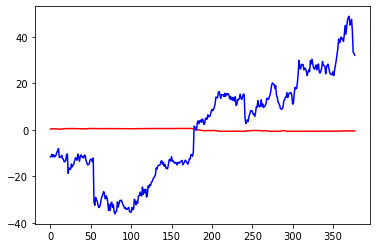

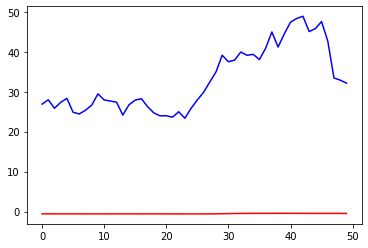

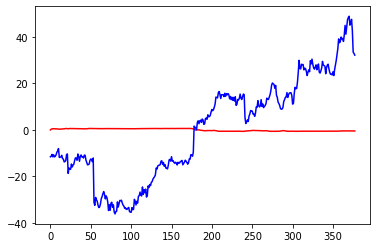

In [25]:
pred = esn(X_test)
plt.plot(range(378), pred.view(-1).detach().numpy(), 'r')
plt.plot(range(378), y_test.view(-1).detach().numpy(), 'b')
plt.show()
plt.plot(range(50), pred.view(-1).detach().numpy()[-50:], 'r')
plt.plot(range(50), y_test.view(-1).detach().numpy()[-50:], 'b')
plt.show()
pred = esn(X_test)
plt.plot(range(378), pred.view(-1).detach().numpy(), 'r')
plt.plot(range(378), y_test.view(-1).detach().numpy(), 'b')
plt.show()

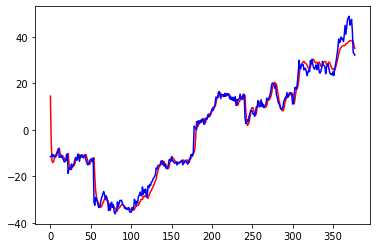

In [27]:
esn = DeepSubreservoirESN(1,1, initializer=SubreservoirWeightInitializer(subreservoir_size=30), num_layers=3, bias=False, activation=A.tanh(leaky_rate=0.6),
               transient=365)
esn.fit(X, y)
pred = esn(X_test)
plt.plot(range(378), pred.view(-1).detach().numpy(), 'r')
plt.plot(range(378), y_test.view(-1).detach().numpy(), 'b')
plt.show()